# Trailing stop loss

In [6]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px
from datetime import datetime

In [7]:
# Download Bitcoin data
btc = pd.DataFrame(yf.download("BTC-USD", start="2020-01-01", end="2023-01-01"))

[*********************100%***********************]  1 of 1 completed


In [8]:
# Define buy price and stop-loss level
buy_price = btc['Close'].iloc[0]
stop_loss = 0.95
stop_loss_level = buy_price * stop_loss

# Create lists to store stop-loss price when triggered
stop_loss_list = [stop_loss_level]

In [9]:
# Initialize variables
stop_loss_count = 0
total_losses = 0
num_bitconis = 1
date_list = []

In [11]:
# Loop through Bitcoin data
for i in range(1, len(btc)):
    # Check if stop-loss should be adjusted
    if btc['Close'].iloc[i] > stop_loss_level:
        stop_loss_level = max(stop_loss_level, btc['Close'].iloc[i] * stop_loss)

        # Add the stop-loss value to the list
        stop_loss_list.append(stop_loss_level)

    # Check if stop-loss has been triggered
    if btc['Close'].iloc[i] <= stop_loss_level:
        stop_loss_count += 1

        # Calculate losses incurred
        losses = buy_price - stop_loss_level

        # Update number of Bitcoins owned
        num_bitcoins = num_bitcoins * (1 - losses / buy_price)

        # Reset buy price and stop-loss level
        buy_price = btc['Close'][i]
        stop_loss_level = buy_price * stop_loss

        # Update the date list when stop-loss triggered
        date_list.append(btc.index[i].strftime('%Y-%m-%d'))

        # Add the new stop-loss value to the list
        stop_loss_list.append(stop_loss_level)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

ValueError: x and y must have same first dimension, but have shapes (1095,) and (0,)

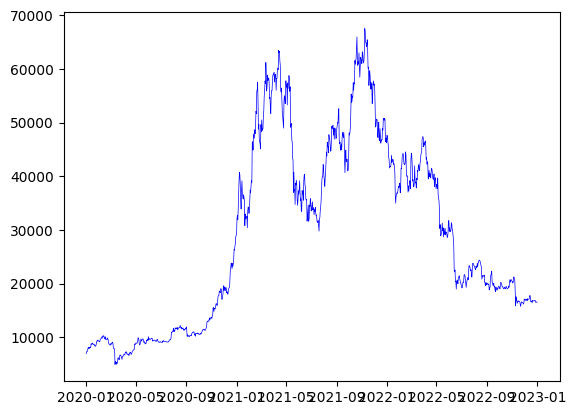

In [12]:
# convert the dates to the desired format
formatted_dates = [datetime.strftime(date, "%y-%m") for date in btc.index]

# plot the dates as vertical lines
for date in date_list:
    plt.axvline(x=date, color='red', linestyle=':', linewidth=0.25)

# plot price bitcoin ans stop-loss
dates = btc.index[1:]
prices = btc['Close'][1:]
plt.plot(dates, prices, color="blue", linewidth=0.5, label="Bitcoin Prices")
plt.plot(dates, stop_loss_list[:-1], color="red", linewidth=0.5, label="Trailing Stop-loss")
plt.legend(loc="upper left")
plt.title("Bitcoin Prices with Trailing stop-loss")
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.legend()
plt.show()

In [13]:
# Print results
print(f"Stop-loss triggered {stop_loss_count} times")
print(f"Total losses incurred: ${round(total_losses, 2)}")
print(f"Final value of Bitcoin holdings: ${round(num_bitcoins * btc['Close'][-1], 2)}")

Stop-loss triggered 0 times
Total losses incurred: $0


NameError: name 'num_bitcoins' is not defined